In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('..')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

from src.representation import get_representation, get_representation_from_series
from src.config import mem
from src.utils import get_fps_offset, get_fps_cols

# from rdkit import RDLogger
# RDLogger.DisableLog('rdApp.*')

X_train_1 = pd.read_pickle('../data/processed/X_train_1.pkl')
y_train_1 = pd.read_pickle('../data/processed/y_train_1.pkl')

In [3]:
# get fingerprints offset
FPS_OFFSET = get_fps_offset(X_train_1.columns)
FPS_OFFSET

2343

In [4]:
mask = (X_train_1.iloc[:, FPS_OFFSET:] == 0).all()
zero_cols = X_train_1.iloc[:, FPS_OFFSET:].columns[mask]
zero_cols

Index([], dtype='object')

# Correlations

In [5]:
corr = mem.cache(lambda x: x.corr())(X_train_1.iloc[:, FPS_OFFSET:])

In [6]:
# na correlated columns
mask = corr.iloc[0,:].isna()
na_corr_cols = corr.columns[mask]
na_corr_cols

Index([], dtype='object')

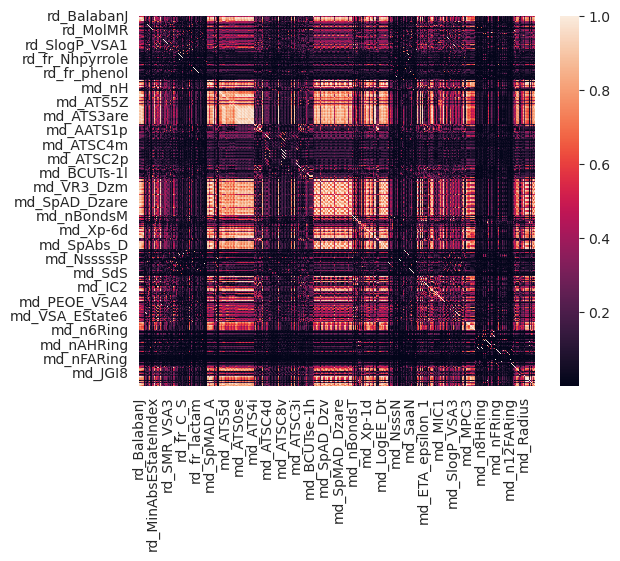

In [7]:
sns.heatmap(corr.abs());

In [8]:
descs_target = pd.concat([X_train_1.iloc[:, FPS_OFFSET:], y_train_1], axis=1)

corr = mem.cache(lambda x: x.corr())(descs_target)

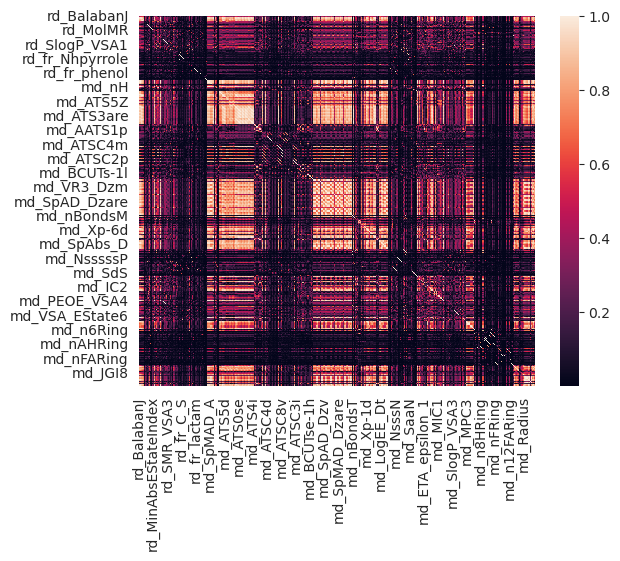

In [9]:
sns.heatmap(corr.abs());

In [10]:
from src.corr import noncorrelated_features

ids = noncorrelated_features(corr, threshold=0.95)

In [11]:
corr.columns[ids]

Index(['rd_BalabanJ', 'rd_EState_VSA1', 'rd_EState_VSA10', 'rd_EState_VSA11',
       'rd_EState_VSA5', 'rd_EState_VSA7', 'rd_FpDensityMorgan1',
       'rd_FpDensityMorgan2', 'rd_FpDensityMorgan3', 'rd_HallKierAlpha',
       ...
       'md_JGI8', 'md_JGI9', 'md_JGI10', 'md_JGT10', 'md_Radius',
       'md_TopoShapeIndex', 'md_SRW09', 'md_SRW10', 'md_TSRW10',
       'md_mZagreb1'],
      dtype='object', length=537)

In [12]:
# md_cols = [c.replace('md_', '') for c in corr.columns[ids] if 'md_' in c]
# rd_cols = [c.replace('rd_', '') for c in corr.columns[ids] if 'rd_' in c]
md_cols = [c for c in corr.columns[ids] if 'md_' in c]
rd_cols = [c for c in corr.columns[ids] if 'rd_' in c]
rd_cols

['rd_BalabanJ',
 'rd_EState_VSA1',
 'rd_EState_VSA10',
 'rd_EState_VSA11',
 'rd_EState_VSA5',
 'rd_EState_VSA7',
 'rd_FpDensityMorgan1',
 'rd_FpDensityMorgan2',
 'rd_FpDensityMorgan3',
 'rd_HallKierAlpha',
 'rd_Ipc',
 'rd_Kappa2',
 'rd_Kappa3',
 'rd_MaxEStateIndex',
 'rd_MinAbsEStateIndex',
 'rd_MinEStateIndex',
 'rd_NumAliphaticCarbocycles',
 'rd_NumAliphaticRings',
 'rd_NumAromaticHeterocycles',
 'rd_NumRadicalElectrons',
 'rd_NumSaturatedCarbocycles',
 'rd_NumSaturatedHeterocycles',
 'rd_NumSaturatedRings',
 'rd_PEOE_VSA1',
 'rd_PEOE_VSA10',
 'rd_PEOE_VSA14',
 'rd_PEOE_VSA2',
 'rd_PEOE_VSA3',
 'rd_PEOE_VSA4',
 'rd_PEOE_VSA5',
 'rd_PEOE_VSA8',
 'rd_PEOE_VSA9',
 'rd_SMR_VSA10',
 'rd_SMR_VSA7',
 'rd_SlogP_VSA10',
 'rd_SlogP_VSA12',
 'rd_SlogP_VSA3',
 'rd_SlogP_VSA4',
 'rd_SlogP_VSA5',
 'rd_SlogP_VSA6',
 'rd_SlogP_VSA7',
 'rd_VSA_EState2',
 'rd_VSA_EState3',
 'rd_VSA_EState4',
 'rd_VSA_EState5',
 'rd_VSA_EState7',
 'rd_VSA_EState8',
 'rd_VSA_EState9',
 'rd_fr_Al_COO',
 'rd_fr_Al_OH_noTe

In [13]:
md_cols

['md_nAcid',
 'md_nBase',
 'md_VR2_A',
 'md_VR3_A',
 'md_nSpiro',
 'md_nBridgehead',
 'md_nO',
 'md_nS',
 'md_nP',
 'md_ATS8dv',
 'md_ATS2s',
 'md_ATS5s',
 'md_ATS6s',
 'md_ATS7s',
 'md_ATS8s',
 'md_ATS0m',
 'md_ATS2m',
 'md_ATS3m',
 'md_ATS4m',
 'md_ATS5m',
 'md_ATS6m',
 'md_ATS8m',
 'md_ATS5i',
 'md_ATS7i',
 'md_AATS0dv',
 'md_AATS1dv',
 'md_AATS1d',
 'md_AATS1s',
 'md_AATS1Z',
 'md_AATS0m',
 'md_AATS1v',
 'md_AATS1are',
 'md_AATS0p',
 'md_AATS1p',
 'md_AATS0i',
 'md_AATS1i',
 'md_ATSC0dv',
 'md_ATSC1dv',
 'md_ATSC2dv',
 'md_ATSC3dv',
 'md_ATSC4dv',
 'md_ATSC5dv',
 'md_ATSC6dv',
 'md_ATSC7dv',
 'md_ATSC8dv',
 'md_ATSC0d',
 'md_ATSC1d',
 'md_ATSC2d',
 'md_ATSC3d',
 'md_ATSC4d',
 'md_ATSC5d',
 'md_ATSC6d',
 'md_ATSC7d',
 'md_ATSC8d',
 'md_ATSC0s',
 'md_ATSC1s',
 'md_ATSC2s',
 'md_ATSC3s',
 'md_ATSC4s',
 'md_ATSC5s',
 'md_ATSC6s',
 'md_ATSC7s',
 'md_ATSC8s',
 'md_ATSC6Z',
 'md_ATSC0m',
 'md_ATSC1m',
 'md_ATSC2m',
 'md_ATSC3m',
 'md_ATSC4m',
 'md_ATSC5m',
 'md_ATSC7m',
 'md_ATSC8m',
 'md

In [14]:
fps_cols = list(range(FPS_OFFSET))

In [15]:
corr.iloc[ids, -1].abs().sort_values(ascending=False)

md_SlogP_VSA8    0.285909
md_NaaaC         0.264743
md_AATS1dv       0.254697
md_SaaaC         0.253333
md_SMR_VSA5      0.246137
                   ...   
md_GGI6          0.000875
md_ATSC0dv       0.000682
md_ETA_dPsi_B    0.000635
md_ATSC8dv       0.000525
md_Xch-6dv       0.000093
Name: target, Length: 537, dtype: float64

In [16]:
# X_train_1 = X_train_1[fps_cols + rd_cols + md_cols]
# X_train_1.shape

In [17]:
X_train_2 = pd.read_pickle('../data/processed/X_train_2.pkl')
y_train_2 = pd.read_pickle('../data/processed/y_train_2.pkl')

X_train_3 = pd.read_pickle('../data/processed/X_train_3.pkl')
y_train_3 = pd.read_pickle('../data/processed/y_train_3.pkl')

In [18]:
def drop_correlated_features(X_train, y_train, threshold=0.95):    
    FPS_OFFSET = get_fps_offset(X_train.columns)
    descs_target = pd.concat([X_train.iloc[:, FPS_OFFSET:], y_train], axis=1)
    corr = mem.cache(lambda x: x.corr())(descs_target)
    ids = noncorrelated_features(corr, threshold)
    uncorr_cols = corr.columns[ids]
    
    md_cols = [c for c in uncorr_cols if 'md_' in c]
    rd_cols = [c for c in uncorr_cols if 'rd_' in c]
    fps_cols = get_fps_cols(X_train.columns)
    
    return X_train[fps_cols + rd_cols + md_cols].copy()

In [19]:
X_train_1.shape

(5094, 3456)

In [20]:
X_train_1 = drop_correlated_features(X_train_1, y_train_1)
X_train_1.shape

________________________________________________________________________________
[Memory] Calling __main__--tmp-ipykernel-815242178.drop_correlated_features.<locals>.<lambda>...
<lambda>(      rd_BalabanJ   rd_BertzCT    rd_Chi0   rd_Chi0n   rd_Chi0v    rd_Chi1  \
id                                                                           
0        2.126255  1081.625979  15.551677  12.633589  12.633589  11.254020   
1        1.489526  3545.358079  33.739029  25.687094  25.687094  24.346244   
2        3.620019   206.527957   8.690234   5.572731   5.572731   5.201907   
3        3.037024   272.982179   7.560478   4.735488   4.735488   4.736382   
4        2.696947   463.594954  14.250712  10.690393  10.690393   9.116922   
...           ...          ...        ...        ...        ...        ...   
5089     1.473146   634.274837  21.681434  20.921541  20.921541  14.202380  ...)
_________________________________________________________<lambda> - 8.5s, 0.1min


(5094, 2880)

In [19]:
X_train_2.shape, y_train_2.shape

((1424, 3812), (1424,))

In [20]:
X_train_2 = drop_correlated_features(X_train_2, y_train_2)
X_train_2.shape

(1424, 3059)

In [21]:
X_train_3 = drop_correlated_features(X_train_3, y_train_3)
X_train_3.shape

(1421, 2892)

In [21]:
X_train_1.to_pickle('../data/processed/X_train_1.pkl')
X_train_2.to_pickle('../data/processed/X_train_2.pkl')
X_train_3.to_pickle('../data/processed/X_train_3.pkl')